In [3]:
#%%
#%pip install seaborn #use this method to install package on the go
import geopandas as gpd
from geopandas import GeoDataFrame, GeoSeries
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
# matplotlib inline
#%pip install seaborn
import seaborn as sns
from shapely.geometry import Point, Polygon
import numpy as np
#%pip install googlemaps
import googlemaps
from datetime import datetime
plt.rcParams["figure.figsize"] = [8,6]
import pandas as pd
#%pip install  simplekml
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.crs import CRS
import rioxarray as rxr
import rasterio
from rasterio.plot import show
import rasterio.plot
import fiona
from shapely.geometry import box
import matplotlib.colors as colors


<Axes: >

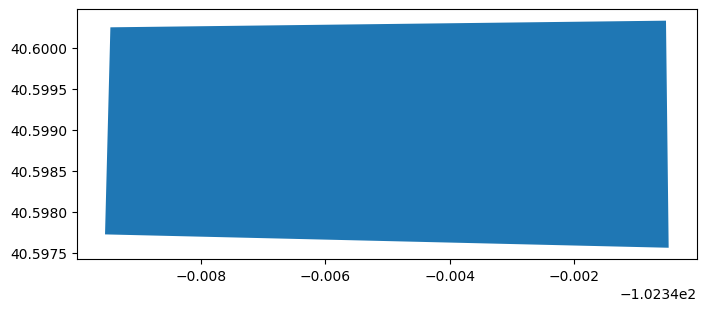

In [4]:

#import utm
from shapely.geometry import Polygon

polygon_points=[[-102.349451,40.600256],[-102.349537,40.597730],[-102.340482, 40.597567],[-102.340525,40.600337],[-102.349451,40.600256]]
#zone=utm.from_latlon(polygon_points[0][1],polygon_points[0][0])


polygon_geom = Polygon(polygon_points)
polygon = gpd.GeoDataFrame(index=[0], crs="epsg:4326", geometry=[polygon_geom]) 
#The below line can be used for new polygons to save the polygon as a zipped shape file
#polygon.to_file(filename='D:\OneDrive - purdue.edu\AutomatingAgFieldTrials\Fall2024\jvkField2_1.zip', driver="ESRI Shapefile")
polygon.plot()

In [5]:
import folium
map = folium.Map(location=[polygon_points[0][1],polygon_points[0][0]], tiles="CartoDB Positron", zoom_start=10)
map


In [6]:
#%%
for _, r in polygon.iterrows():
    #without simplifying the representation of each borough, the map might not be displayed
    #sim_geo = gpd.GeoSeries(r['geometry'])
    
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    print(geo_j)
    geo_j = folium.GeoJson(data=geo_j,style_function=lambda x: {"fillColor": "orange"})
    geo_j.add_to(map)
    

{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[-102.349451, 40.600256], [-102.349537, 40.59773], [-102.340482, 40.597567], [-102.340525, 40.600337], [-102.349451, 40.600256]]]}, "bbox": [-102.349537, 40.597567, -102.340482, 40.600337]}], "bbox": [-102.349537, 40.597567, -102.340482, 40.600337]}


In [7]:
map

EPSG:26913
(10012, 10012)


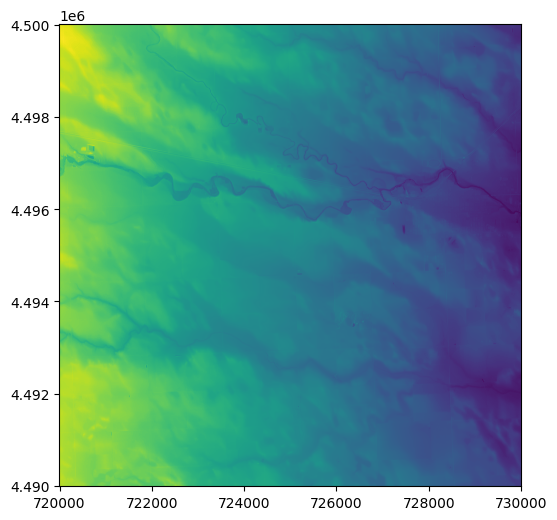

<Axes: >

In [8]:
#output_tif=r"/Users/jhasneha/Documents/DOEjha/jvkField2/JVK_shared/JVKF2_USGS_1M_13_x72y450_CO_NESEColorado_2019_C20.tif"
output_tif=r"D:\OneDrive - purdue.edu\AutomatingAgFieldTrials\Fall2024\jvkField2\JVKF2_USGS_1M_13_x72y450_CO_NESEColorado_2019_C20.tif"

imgUSGS = rasterio.open(output_tif)
print(imgUSGS.crs)
print(imgUSGS.shape)
show(imgUSGS)


In [9]:
lidarfile=imgUSGS
jvkF2LidarfileCRS=polygon.to_crs(lidarfile.crs)
#the below line can changed to generalize the following lines by substituting the field of interest variable here
FieldOfInterest=jvkF2LidarfileCRS

In [10]:
lidarfile.shape

(10012, 10012)

C:\Users\jha16admin\AppData\Local\Temp\ipykernel_31648\384811175.py:1: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  ax = FieldOfInterest.plot( column="name",color="None", alpha=0.8, cmap="tab10")
C:\Users\jha16admin\AppData\Local\Temp\ipykernel_31648\384811175.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.xlim([float(FieldOfInterest.bounds.minx)-50, float(FieldOfInterest.bounds.maxx)+50])
C:\Users\jha16admin\AppData\Local\Temp\ipykernel_31648\384811175.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.ylim([float(FieldOfInterest.bounds.miny)-50, float(FieldOfInterest.bounds.maxy)+50])


(4497429.742524607, 4497842.185650435)

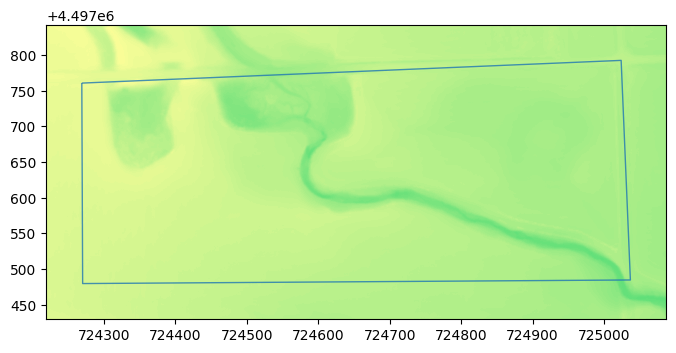

In [11]:



ax = FieldOfInterest.plot( column="name",color="None", alpha=0.8, cmap="tab10")
# AcreMultipolygon2022.apply(lambda x: ax.annotate(text=x['Name'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
rasterio.plot.show(lidarfile,ax=ax, cmap="terrain")
# ctx.add_basemap(ax,
#                 crs=lidarfile.crs,
#                 source=ctx.providers.USGS.USImagery
#                )
plt.xlim([float(FieldOfInterest.bounds.minx)-50, float(FieldOfInterest.bounds.maxx)+50])
plt.ylim([float(FieldOfInterest.bounds.miny)-50, float(FieldOfInterest.bounds.maxy)+50])


In [12]:
print(lidarfile.count)
horizontal_resolution=(lidarfile.bounds.right- lidarfile.bounds.left)/lidarfile.width
print("resolution of lidar file", horizontal_resolution)
vertical_resolution=(lidarfile.bounds.top- lidarfile.bounds.bottom)/lidarfile.height
print("resolution of lidar file", vertical_resolution)


1
resolution of lidar file 1.0
resolution of lidar file 1.0


calculated resolutions for lidar data are:  1.0 5.0 10.0
Field Dimensions are:  0    767.995708
dtype: float64 0    312.443126
dtype: float64
Area of field is:  0    239954.979764
dtype: float64


C:\Users\jha16admin\AppData\Local\Temp\ipykernel_31648\1943680632.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bboxfieldShapeUTM=float(fieldShapeUTM.bounds.minx-(stepLowerRes)),float(fieldShapeUTM.bounds.miny-(stepLowerRes)),float(fieldShapeUTM.bounds.maxx+(stepLowerRes)),float(fieldShapeUTM.bounds.maxy+(stepLowerRes))


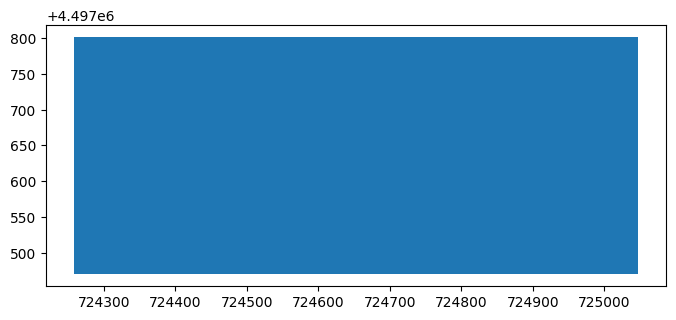

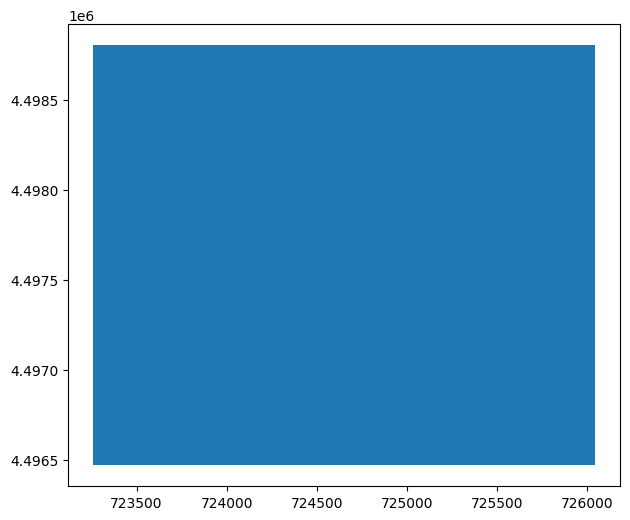

In [13]:

fieldShapeUTM=FieldOfInterest
step=horizontal_resolution  #1 meter for uSGS and 2.5feet for jinha 
stepLowRes=step*5   #step*5        #step*7  #5 meters creates 150 point for 3.2km length acre field can also use array size to calculate distance
stepLowerRes=step*10 #step*10    #step*13  #10 meters creates 150 point for 3.2km length acre field can also use array size to calculate distance
print("calculated resolutions for lidar data are: ", step,stepLowRes,stepLowerRes)

bboxfieldShapeUTM=float(fieldShapeUTM.bounds.minx-(stepLowerRes)),float(fieldShapeUTM.bounds.miny-(stepLowerRes)),float(fieldShapeUTM.bounds.maxx+(stepLowerRes)),float(fieldShapeUTM.bounds.maxy+(stepLowerRes))
clipper = box(bboxfieldShapeUTM[0],bboxfieldShapeUTM[1],bboxfieldShapeUTM[2],bboxfieldShapeUTM[3])
fieldClipper = gpd.GeoDataFrame(index=[0], crs=lidarfile.crs, geometry=[clipper])
fieldClipper.plot()
#bigger buffer block for the field to be plotted in contextily
buffer = box(bboxfieldShapeUTM[0]-1000,bboxfieldShapeUTM[1]-1000,bboxfieldShapeUTM[2]+1000,bboxfieldShapeUTM[3]+1000)
fieldbuffer = gpd.GeoDataFrame(index=[0], crs=lidarfile.crs, geometry=[buffer])
fieldbuffer.plot()


Xwidth=fieldShapeUTM.bounds.maxx-fieldShapeUTM.bounds.minx
Ylength=fieldShapeUTM.bounds.maxy-fieldShapeUTM.bounds.miny
Areaoffield=Xwidth*Ylength
print("Field Dimensions are: ",Xwidth,Ylength)
print("Area of field is: ",Areaoffield)

<Axes: >

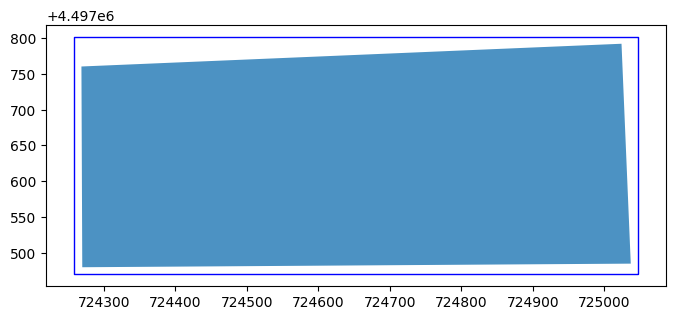

In [14]:


afax = FieldOfInterest.plot(  alpha=0.8, cmap="tab10")
fieldClipper.plot(ax=afax,color="None",edgecolor="blue")
#fieldbuffer.plot(ax=afax,color="None",edgecolor="black")



C:\Users\jha16admin\AppData\Local\Temp\ipykernel_31648\310676902.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  xmin,ymin= float(fieldShapeUTM.bounds.minx),float(fieldShapeUTM.bounds.miny)
C:\Users\jha16admin\AppData\Local\Temp\ipykernel_31648\310676902.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  xmax,ymax= float(fieldShapeUTM.bounds.maxx),float(fieldShapeUTM.bounds.maxy)


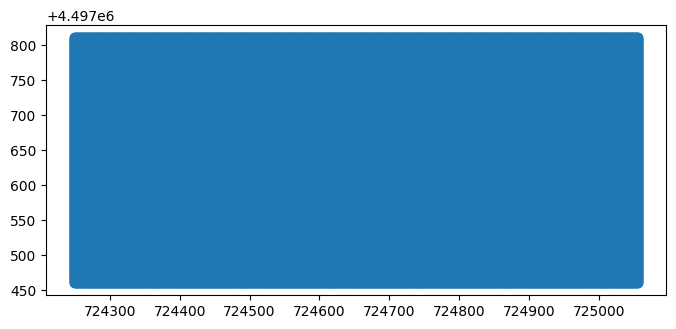

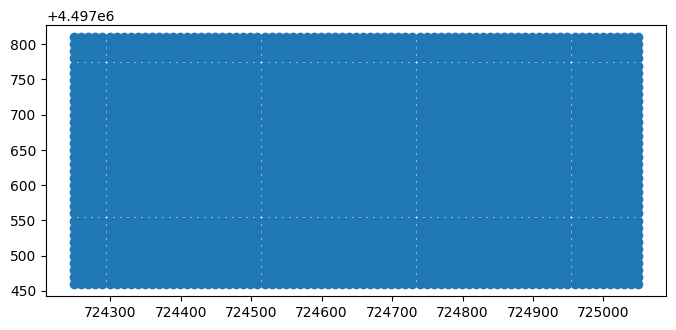

In [15]:
#the below code is converted into module in the full length program to shorten the length of the file.
xmin,ymin= float(fieldShapeUTM.bounds.minx),float(fieldShapeUTM.bounds.miny)
xmax,ymax= float(fieldShapeUTM.bounds.maxx),float(fieldShapeUTM.bounds.maxy)
xmin=xmin-(stepLowerRes*2)
ymin=ymin-(stepLowerRes*2)
xmax=xmax+(stepLowerRes*2)
ymax=ymax+(stepLowerRes*2)
""" 1m/2.5m resolution aspect calculation for visualization"""

xcoordsHighRes = [i for i in np.arange(xmin, xmax, step)]
ycoordsHighRes = [i for i in np.arange(ymin, ymax, step)]

pointcoords = np.array(np.meshgrid(xcoordsHighRes, ycoordsHighRes)).T.reshape(-1,2) #A 2D array like [[x1,y1], [x1,y2], ...
points = gpd.points_from_xy(x=pointcoords[:,0], y=pointcoords[:,1])

grid = gpd.GeoSeries(points,crs=lidarfile.crs)
grid.plot()
ptsgdfHighRes= gpd.GeoDataFrame(geometry=gpd.GeoSeries(grid))

""" low resolution aspect calculation for visualization"""
# xmin, ymin, xmax, ymax = minx, miny, maxx, maxy

xcoordsLowRes = [i for i in np.arange(xmin, xmax, stepLowRes)]
ycoordsLowRes = [i for i in np.arange(ymin, ymax, stepLowRes)]

pointcoordsLowRes = np.array(np.meshgrid(xcoordsLowRes, ycoordsLowRes)).T.reshape(-1,2) #A 2D array like [[x1,y1], [x1,y2], ...
pointsLowRes = gpd.points_from_xy(x=pointcoordsLowRes[:,0], y=pointcoordsLowRes[:,1])
gridLowRes = gpd.GeoSeries(pointsLowRes, crs=lidarfile.crs)
ptsgdfLowRes= gpd.GeoDataFrame(geometry=gpd.GeoSeries(gridLowRes))
""" lower resolution for aspect calculation for visualization"""
# xmin, ymin, xmax, ymax = minx, miny, maxx, maxy

xcoordsLowerRes = [i for i in np.arange(xmin, xmax, stepLowerRes)]
ycoordsLowerRes = [i for i in np.arange(ymin, ymax, stepLowerRes)]

pointcoordsLowerRes = np.array(np.meshgrid(xcoordsLowerRes, ycoordsLowerRes)).T.reshape(-1,2) #A 2D array like [[x1,y1], [x1,y2], ...
pointsLowerRes = gpd.points_from_xy(x=pointcoordsLowerRes[:,0], y=pointcoordsLowerRes[:,1])
gridLowerRes = gpd.GeoSeries(pointsLowerRes, crs=lidarfile.crs)
ptsgdfLowerRes= gpd.GeoDataFrame(geometry=gpd.GeoSeries(gridLowerRes))
gridLowerRes.plot()
coord_listHighRes = [(x,y) for x,y in zip(ptsgdfHighRes["geometry"].x , ptsgdfHighRes["geometry"].y)]

coord_listLowRes = [(x,y) for x,y in zip(ptsgdfLowRes["geometry"].x , ptsgdfLowRes["geometry"].y)]

coord_listLowerRes = [(x,y) for x,y in zip(ptsgdfLowerRes["geometry"].x , ptsgdfLowerRes["geometry"].y)]
""" HIGH resolution aspect and slope calculation for visualization"""
ptsgdfHighRes["elevation"]= [x for x in lidarfile.sample(coord_listHighRes)]
ptsgdfHighRes["elevation(m)"]=ptsgdfHighRes["elevation"].astype(float)#*0.3048 #convert USfoot to m for jinha data
xHighRes,yHighRes=len(xcoordsHighRes),len(ycoordsHighRes)
elevationArray=ptsgdfHighRes["elevation(m)"].values.reshape(xHighRes, yHighRes)


#length from len(xcoords) and len(ycoords)
dxHighRes,dyHighRes=np.gradient(elevationArray)
slope = np.sqrt(dxHighRes**2 + dyHighRes**2)
ptsgdfHighRes["slope"]=slope.flatten()
ptsgdfHighRes["dxHighRes"]=dxHighRes.flatten()
ptsgdfHighRes["dyHighRes"]=dyHighRes.flatten()


dxHighRes,dyHighRes = np.gradient(elevationArray)
aspect=np.arctan2(-dyHighRes, dxHighRes)
ptsgdfHighRes["aspect"]=aspect.flatten()


""" low resolution aspect and slope calculation for visualization"""
ptsgdfLowRes["elevation"]= [x for x in lidarfile.sample(coord_listLowRes)]
ptsgdfLowRes["elevation(m)"]=ptsgdfLowRes["elevation"].astype(float)#*0.3048 #convert USfoot to m for jinha data
xLowRes,yLowRes=len(xcoordsLowRes),len(ycoordsLowRes)
elevationArrayLowRes=ptsgdfLowRes["elevation(m)"].values.reshape(xLowRes,yLowRes)


#length from len(xcoords) and len(ycoords)
dxLowRes,dyLowRes=np.gradient(elevationArrayLowRes)
slopeLowRes = np.sqrt(dxLowRes**2 + dyLowRes**2)
ptsgdfLowRes["slope"]=slopeLowRes.flatten()
ptsgdfLowRes["dxLowRes"]=dxLowRes.flatten()
ptsgdfLowRes["dyLowRes"]=dyLowRes.flatten()


dxLowRes, dyLowRes = np.gradient(elevationArrayLowRes)
aspectLowRes=np.arctan2(-dyLowRes, dxLowRes)
ptsgdfLowRes["aspect"]=aspectLowRes.flatten()


""" Much lower resolution aspect and slope calculation for visualization of aspect"""

ptsgdfLowerRes["elevation"]= [x for x in lidarfile.sample(coord_listLowerRes)]
ptsgdfLowerRes["elevation(m)"]=ptsgdfLowerRes["elevation"].astype(float)#*0.3048 #convert USfoot to m for jinha data
xLowerRes,yLowerRes=len(xcoordsLowerRes),len(ycoordsLowerRes)
elevationArrayLowerRes=ptsgdfLowerRes["elevation(m)"].values.reshape(xLowerRes,yLowerRes)
#length from len(xcoords) and len(ycoords)
dxLowerRes,dyLowerRes=np.gradient(elevationArrayLowerRes)
slopeLowerRes = np.sqrt(dxLowerRes**2 + dyLowerRes**2)
ptsgdfLowerRes["slope"]=slopeLowerRes.flatten()
ptsgdfLowerRes["dxLowerRes"]=dxLowerRes.flatten()
ptsgdfLowerRes["dyLowerRes"]=dyLowerRes.flatten()
dxLowerRes, dyLowerRes = np.gradient(elevationArrayLowerRes)
aspectLowerRes=np.arctan2(-dyLowerRes, dxLowerRes)
ptsgdfLowerRes["aspect"]=aspectLowerRes.flatten()
ptsgdfLowRes_clipped=gpd.clip(ptsgdfLowRes,fieldClipper)
ptsgdfLowerRes_clipped=gpd.clip(ptsgdfLowerRes,fieldClipper)
ptsgdfHighRes_clipped=gpd.clip(ptsgdfHighRes, fieldClipper)
    # return(ptsgdfHighRes_clipped,ptsgdfLowRes_clipped,ptsgdfLowerRes_clipped, elevationArrayLowRes)
imgAcreMergedUSGSVectorHighRes=ptsgdfHighRes.copy()
imgAcreMergedUSGSVectorLowRes= ptsgdfLowRes.copy()
imgAcreMergedUSGSVectorLowerRes=ptsgdfLowerRes.copy()



In [16]:
def cmapElevationBinsSlopeAspectVisualization(plotDestinationPath,bins,datasource,ptsgdfHighRes_clipped,ptsgdfLowerRes_clipped):
    import contextily as ctx
    import matplotlib.pyplot as plt
    import matplotlib.colors as colors
    import os
    hfont = {'fontname':'Times New Roman'}
    plt.rcParams['font.size'] = 13
    # plt.rcParams['font.sans-serif']='Gill Sans'
    # fig, myax = plt.subplots(figsize=(6, 2))

    fieldname="JVK_Plot2"
    colors_land = plt.cm.nipy_spectral(np.linspace(0.40, 0.9, bins+1))

    terrain_map = colors.LinearSegmentedColormap.from_list(
        'terrain_map', colors_land)

    bounds = np.linspace(ptsgdfHighRes_clipped["elevation(m)"].min(), ptsgdfHighRes_clipped["elevation(m)"].max(), bins+1)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

    gdf=ptsgdfHighRes_clipped.copy()
    gdf_aspect=ptsgdfLowerRes_clipped.copy()
    myax = gdf.plot(column=gdf["elevation(m)"], alpha=1,norm=norm,  markersize=0.5, cmap=terrain_map, legend=True, legend_kwds={"label": "Lidar elevation (m)", "fmt":"%.1f","orientation": "vertical",'shrink':0.4, 'aspect':30})
    
    X= gdf_aspect['geometry'].x
    Y = gdf_aspect['geometry'].y
    U = np.cos(gdf_aspect['aspect']) #this is correct because the arctan function converts the gradient x and y values its angle angle
    V = np.sin(gdf_aspect['aspect'])
    uvis=U*(np.log(gdf_aspect['slope']+1)/np.log(2))
    vvis=V*(np.log(gdf_aspect['slope']+1)/np.log(2))
    uvisA= uvis*(100/gdf_aspect['slope'].max())
    vvisA= vvis*(100/gdf_aspect['slope'].max())
    # ax1=myax
    q=myax.quiver(X,Y,uvisA,vvisA)
    myax.quiverkey(q,5, 5.4, 100,label= 'Negative Gradient', labelpos='E',
                   coordinates='inches')
    fieldShapeUTM.plot(ax=myax, color="None", edgecolor="blue")
    # myax.annotate("Purdue ACRE", xy=(0.8, 0.01), xycoords='axes fraction',fontsize=14, **hfont)

    # plt.title("Slope and aspect visualization with "+str(bins)+" elevation zones (hist bins) in \n "+fieldname+ " at Purdue ACRE",fontsize=14, **hfont)
    plt.title("Elevation, Slope and aspect visualization with "+str(bins)+" bins.",fontsize=14, **hfont)

    # AcreMultipolygon2022UTM=AcreMultipolygon2022.to_crs(fieldShapeUTM.crs)
    fieldbuffer.plot(ax=myax, color="None",edgecolor="gray",  alpha=0.2)
    ctx.add_basemap(myax,
                    # crs=AcreMultipolygon2022UTM.crs,
                    crs=fieldShapeUTM.crs,
                    source=ctx.providers.USGS.USImagery
                )
    plt.xlim([float(fieldShapeUTM.bounds.minx)-160, float(fieldShapeUTM.bounds.maxx)+160])
    plt.ylim([float(fieldShapeUTM.bounds.miny)-160, float(fieldShapeUTM.bounds.maxy)+160])  
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    
    plotname1=datasource+"_Slope_Aspect_visualization_"+str(bins)+"_bins_"+fieldname
    outputPath=plotDestinationPath
    SavePath=os.path.join(outputPath,plotname1)
    #plt.savefig(SavePath, dpi=600,bbox_inches = 'tight')
    plt.show()
    fighist, histax = plt.subplots(1,2,figsize=(6.4, 4.8),sharey=True,tight_layout=True)
    
   
    # histax.hist(ptsgdfHighRes_clipped[hist_var], bins=bins, edgecolor="black", color="#69b3a2", alpha=0.3)
    histax[0].hist(ptsgdfHighRes_clipped["slope"], bins=bins,edgecolor="black", color="darkmagenta", alpha=0.3)
    histax[1].hist(ptsgdfHighRes_clipped["elevation(m)"], bins=bins,edgecolor="black", color="sienna", alpha=0.3)

    histax[0].grid(which='major', color='gray', linestyle=':', linewidth=0.5)
    histax[1].grid(which='major', color='gray', linestyle=':', linewidth=0.5)
    
    histax[0].set_xlabel("Slope" , fontsize=14, **hfont)
    histax[1].set_xlabel("Elevation(m)", fontsize=14,**hfont)
    
    histax[0].tick_params(which='major', labelsize=12)
    histax[1].tick_params(which='major', labelsize=12)

    plt.suptitle("Histograms of Slope and Elevation with "+str(bins)+" bins \n in Purdue Acre Field 57", ha="center", fontsize=14,  **hfont)

    fighist.supylabel("Count", fontsize=14,**hfont)
    
    # # axvline: axis vertical line
    histax[0].axvline(ptsgdfHighRes_clipped["slope"].median(), color="red", ls="--", label="Median ")
    histax[0].axvline(ptsgdfHighRes_clipped["slope"].mean(), color="blue", ls=":", label="Mean ")
    histax[1].axvline(ptsgdfHighRes_clipped["elevation(m)"].median(), color="red", ls="--", label="Median ")
    histax[1].axvline(ptsgdfHighRes_clipped["elevation(m)"].mean(), color="blue", ls=":", label="Mean ")

    
    plt.legend(prop={'size': 12,'family':'Times new Roman'})
    plotname2=datasource+"_HistogramsEle_Slope_"+ fieldname+"_"+str(bins)+"_bins"
    outputPath=plotDestinationPath
    SavePathhist=os.path.join(outputPath,plotname2)
    #plt.savefig(SavePathhist, dpi=300,bbox_inches = 'tight')
    plt.show()


C:\Users\jha16admin\AppData\Local\Temp\ipykernel_31648\542707748.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.xlim([float(fieldShapeUTM.bounds.minx)-160, float(fieldShapeUTM.bounds.maxx)+160])
C:\Users\jha16admin\AppData\Local\Temp\ipykernel_31648\542707748.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.ylim([float(fieldShapeUTM.bounds.miny)-160, float(fieldShapeUTM.bounds.maxy)+160])


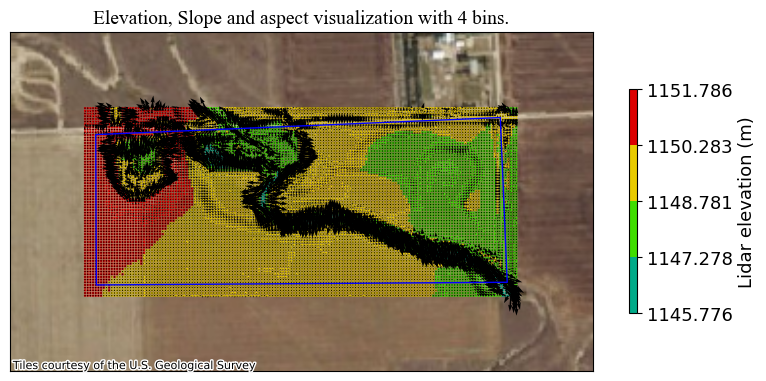

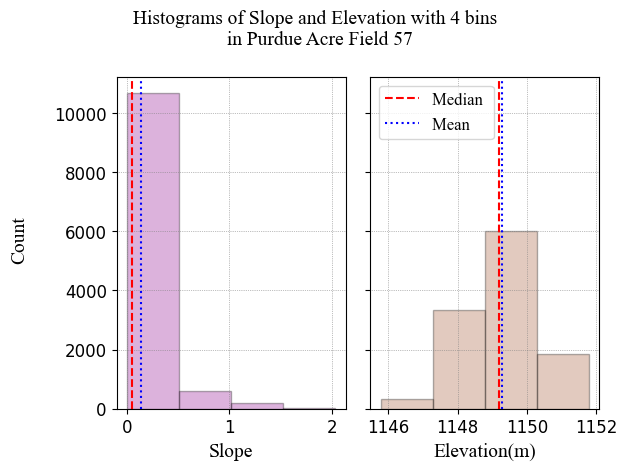

In [17]:
#the path to the destination folders hould be changed here
#plotDestinationPath=r"/Users/jhasneha/Documents/DOEjha/jvkField2/JVK_shared"
plotDestinationPath=r"D:\OneDrive - purdue.edu\AutomatingAgFieldTrials\Fall2024\jvkField2\plots"
binsList=[4]
for bins in binsList:
    cmapElevationBinsSlopeAspectVisualization(plotDestinationPath,bins,"USGS",imgAcreMergedUSGSVectorLowRes,imgAcreMergedUSGSVectorLowRes)


In [18]:
resDict={"imgAcreMergedUSGSVectorLowRes":stepLowRes,"imgAcreMergedUSGSVectorLowerRes":stepLowerRes,"imgAcreMergedUSGSVectorHighRes":step}
elevationArrayDict={"imgAcreMergedUSGSVectorLowRes":elevationArrayLowRes,"imgAcreMergedUSGSVectorLowerRes":elevationArrayLowerRes,"imgAcreMergedUSGSVectorHighRes":elevationArray}
shapeLowRes=(xLowRes,yLowRes) 
shapeLowerRes=(xLowerRes,yLowerRes)
shapeHighRes=(xHighRes,yHighRes)
shapeDict={"imgAcreMergedUSGSVectorLowRes":shapeLowRes,"imgAcreMergedUSGSVectorLowerRes":shapeLowerRes,"imgAcreMergedUSGSVectorHighRes":shapeHighRes}


import numpy as np
import matplotlib.pyplot as plt
import math

def calculate_twi(elevation_array, cell_size):
    n, m = elevation_array.shape
    print("elevation array shape n,m: ", n,m)
    twi_array = np.zeros((n, m))
    flow_direction = np.zeros((n, m))  # For direction in degrees
    contributing_area_array = np.zeros((n, m))
    flow_x = np.zeros((n, m))  # X component of flow direction
    flow_y = np.zeros((n, m))  # Y component of flow direction
    slope_array = np.zeros((n, m))

    # for i in range(1, n - 1):
    #     for j in range(1, m - 1):
    for i in range(n - 2, 1, -1): #starting the grid from northwest to southeast geographically.
        for j in range(1, m-1):
    # for j in range(m-2, 1,-1): #starting the grid from northwest to southeast geographically.
    #     for i in range(1, n-1):
            #window = elevation_array[i-1:i+2, j-1:j+2]
            center_elevation = elevation_array[i, j]
            max_downslope = -float('inf')  # Start with very low value for slope comparison
            max_downslope_direction = (0, 0)
            inherited_contributing_area = np.zeros((3, 3))

            # List to store the slopes of all higher elevation cells
            higher_elevation_slopes = []
            #arr=np.zeros((3, 3))
            # Only consider cells that are higher than the current cell
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                neighbor_elevation = elevation_array[i + di, j + dj]
                distance = cell_size
                slope = (center_elevation - neighbor_elevation) / distance
                sloperad=math.atan(slope)*(math.pi/180)
                slope_array[i, j] = sloperad
                # Accumulate flow from higher cells
                if slope < 0:
                    inherited_contributing_area[di,dj] = contributing_area_array[i + di, j + dj]
                    higher_elevation_slopes.append(abs(sloperad))  # Add slope magnitude for weighting
                
                # Find the steepest downslope direction
                if slope > max_downslope:
                    max_downslope = slope
                    max_downslope_direction = (di, dj)

            # Calculate total magnitude for all higher elevation slopes
            total_upslope_magnitude = sum(higher_elevation_slopes)

            # Calculate contributing area with weights for each higher cell
            if total_upslope_magnitude > 0:
                contributing_area = 0 #moved this inside the loop to accomodate else condition
                for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    neighbor_elevation = elevation_array[i + di, j + dj]
                    if center_elevation < neighbor_elevation:
                        slope = abs(center_elevation - neighbor_elevation) / cell_size
                        sloperad=math.atan(slope)*(math.pi/180)
                        # Weight is based on each cell's slope divided by the total upslope magnitude
                        weight = sloperad / total_upslope_magnitude
                        # Add the weighted contributing area
                        contributing_area += weight * (cell_size ** 2) + inherited_contributing_area[di,dj]
            #added this else condition
            else:
                contributing_area=sum(sum(inherited_contributing_area))
                print("the inherited area when < zero upslope",contributing_area )

            # Store the final contributing area for the cell
            contributing_area_array[i, j] = contributing_area
            print(f"the contributing area at {i,j} is : ",contributing_area_array[i, j])
            # Set the flow direction for visualization
            if max_downslope > 0:
                flow_x[i, j] = max_downslope_direction[1]
                flow_y[i, j] = -max_downslope_direction[0]

            # Calculate TWI
            if contributing_area_array[i, j] > 0 and max_downslope > 0:
                specific_contributing_area = (contributing_area_array[i, j] +1) / cell_size*len(higher_elevation_slopes)
                tan_beta = math.tan(np.mean(higher_elevation_slopes))if higher_elevation_slopes else 0.1 #in  radians 0.1 #0.001 #max_downslope
                if tan_beta > 0:
                    twi_array[i, j] = np.log(specific_contributing_area / tan_beta)

    return twi_array, contributing_area_array,flow_x,flow_y, slope_array





# Calculate TWI
twi_array, contributing_area_array,flow_x,flow_y, slopeArray = calculate_twi(elevationArrayDict["imgAcreMergedUSGSVectorLowRes"], resDict["imgAcreMergedUSGSVectorLowRes"])
fig,ax=plt.subplots()
plt.imshow(twi_array, cmap='binary')
plt.colorbar()
plt.title("TWI")
fig,ax=plt.subplots()
plt.imshow(contributing_area_array, cmap='binary')
plt.colorbar()
plt.title("contributing area")
fig,ax=plt.subplots()
plt.imshow(slopeArray, cmap='binary')
plt.colorbar()
plt.title("Slope")

In [19]:
elevation_array = np.array([
    [1130, 1125, 1137, 1132],
    [1131, 1127, 1148, 1136],
    [1134, 1129, 1133, 1135],
    [1131, 1141, 1129, 1125],
    [1133, 1144, 1132, 1127]
])
n,m = elevation_array.shape
print("the shape of elevation array is: ",n,m)
for i in range(n-2, 0, -1):
    for j in range(1, m-1, 1):
        print("the elevation is: ",i,j,elevation_array[i,j])

the shape of elevation array is:  5 4
the elevation is:  3 1 1141
the elevation is:  3 2 1129
the elevation is:  2 1 1129
the elevation is:  2 2 1133
the elevation is:  1 1 1127
the elevation is:  1 2 1148


In [20]:
print(imgAcreMergedUSGSVectorHighRes["elevation(m)"].describe(),imgAcreMergedUSGSVectorHighRes["elevation(m)"].var())
print(imgAcreMergedUSGSVectorLowRes["elevation(m)"].describe(),imgAcreMergedUSGSVectorLowRes["elevation(m)"].var())
print(imgAcreMergedUSGSVectorLowerRes["elevation(m)"].describe(),imgAcreMergedUSGSVectorLowerRes["elevation(m)"].var())

count    285224.000000
mean       1149.270998
std           0.941045
min        1145.676392
25%        1148.644531
50%        1149.193115
75%        1149.929199
max        1151.823853
Name: elevation(m), dtype: float64 0.8855656182236386
count    11502.000000
mean      1149.273972
std          0.942881
min       1145.775879
25%       1148.646149
50%       1149.194885
75%       1149.934784
max       1151.785767
Name: elevation(m), dtype: float64 0.8890238726787647
count    2916.000000
mean     1149.282122
std         0.946224
min      1145.775879
25%      1148.661407
50%      1149.199036
75%      1149.938568
max      1151.705200
Name: elevation(m), dtype: float64 0.8953392130968343


In [21]:
import numpy as np



def calculateDownwardSlope(elevation_array, cell_size):
    import math
    n, m = elevation_array.shape
    downward_Slope_array = np.zeros((n, m))
    
    for row in range(1, n-1,1): 
        for col in range(1, m-1,1):
            downward_slopes = []
    # Calculate slopes and contributing area for the current cell
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                # Boundary check: Ensure i + di and j + dj are within bounds
                ni, nj = row + di, col + dj
                if ni < 0 or ni > n or nj < 0 or nj > m:
                    print("out of bounds 2")
                    continue  # Skip if neighbor is out of bounds

                neighbor_elevation = elevation_array[ni, nj]
                distance = cell_size
                center_elevation=elevation_array[row, col]
                slope = (center_elevation - neighbor_elevation) / distance
                #print("the slope is: ",slope)
                # Accumulate flow from higher cells
                if slope > 0:
                    downward_slopes.append(abs(slope))
                #print(f"the downward slope at{row,col} is: ",len(downward_slopes))
    # Total upslope magnitude and contributing area calculation
            downward_Slope_array[row,col] = np.round(np.sum(downward_slopes),3)

            #print("the total upslope contribution is: ",Static_contributing_area_array[row,col])
    return downward_Slope_array



""" This is my working algorithm for propagating the flagging in the nearest neighbor slope weight algorithm"""

def propagate_flagging(elevation_array, start_cell):
    """
    Propagate the flagging process for connected cells with higher elevation.
    """
    elevation_array=np.round(elevation_array,2)
    rows, cols = elevation_array.shape
    flagged_array = np.zeros_like(elevation_array, dtype=int)
    queue = [start_cell]  # Initialize queue with the start cell
    flagged_array[start_cell] = 1

    # Define the offsets for orthogonal neighbors
    offsets = [
        (-1, 0),  # Top
        (0, -1), (0, 1),  # Left and Right 
        (1, 0)   # Bottom
    ]
    """Perform a breadth-first search to propagate flagging, starting from the first cell. The queue is used to store the cells 
    flagged as higher elevation in the order they were visited. This is useful for avoiding infinite looping along with the not flagged_array[ni,nj] condition ensures 
    that the neighbor cell has not been flagged before. This stops the algorith to accept the center pixel again. This is important to avoid infinite 
    looping due to center pixels in the search process."""

    while queue:
        #print("the queue is: ",queue)
        current_cell = queue.pop(0)
        #print("the current cell is: ",current_cell)
        #print("the popped queue is: ",queue)
        i, j = current_cell
        for dx, dy in offsets:
            ni, nj = i + dx, j + dy

            # Check if the neighbor is within bounds and has not been flagged
            #if 0 < ni < rows-1 and 0 < nj < cols-1 and not flagged_array[ni, nj]: # Check if the neighbor is within bounds not i, j instead it is ni, nj
            if 1 <= ni < rows-1 and 1 <= nj < cols-1 and not flagged_array[ni, nj]: #both are correct but this includes the calculation including the padding cells
                # Check if the neighbor has a higher elevation
                if elevation_array[ni, nj] > elevation_array[i, j]:
                    flagged_array[ni, nj] = 1
                    #print(f"flagged array at {i,j} is {ni,nj} into the queue ")
                    queue.append((ni, nj))
            #     else:
            #         #print(f"oops!! downslope at {ni,nj} from {i,j}")
            # else:
            #     print(f"not flagged array at {ni,nj}")

    return flagged_array



""" This is my working algorithm for TWI in the nearest neighbor slope weight algorithm"""
# # # visualization with fixed coordinate alignment
def Calculate_TWI(elevation_array, cell_size):
    """
    Visualize the flagged arrays for all cells from (1, 1) to (n-1, m-1) with corrected coordinate alignment.
    """
    import math
    rows, cols = elevation_array.shape
    # Static_contributing_area_array=calculate_contributingArea_for_cell(elevation_array, cell_size)
    contributing_area_array = np.zeros_like(elevation_array, dtype=float)
    average_slope_array = np.zeros_like(elevation_array, dtype=float)
    Twi_array=np.zeros_like(elevation_array, dtype=float)
    for row in range(1, rows - 1):  # Start from (1,1) and exclude borders
        for col in range(1, cols - 1):
            higher_elevation_slopes = []
            #print("the row and col are: ",row,col)
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                # Boundary check: Ensure i + di and j + dj are within bounds
                ni, nj = row + di, col + dj
                if ni < 0 or ni >= rows or nj < 0 or nj >= cols:
                    print("out of bounds 3")
                    continue  # Skip if neighbor is out of bounds

                #print("the kernel row and col are: ",ni,nj)
                neighbor_elevation = elevation_array[ni, nj]
                distance = cell_size
                center_elevation=elevation_array[row, col]
                #print("the center elevation is: ",center_elevation)
                #print("the neighbor elevation is: ",neighbor_elevation)
                slope = (center_elevation - neighbor_elevation) / distance
                #print("the slope is: ",slope)
                # Accumulate flow from higher cells
                inherited_array=[]
                if slope < 0:
                    flagged_array= np.zeros_like(elevation_array, dtype=float)

                    flagged_array = propagate_flagging(elevation_array, (ni, nj))
                   
                    #area_array=flagged_array*Static_contributing_area_array
                    inherited_array.append(np.sum(flagged_array))
                    #print("the inherited array is: ",inherited_array)
                    higher_elevation_slopes.append(slope)
                
                for element in range(len(inherited_array)):
                    higher_elevation_slopes[element]=math.atan(higher_elevation_slopes[element])*(math.pi/180)
                    contributing_area= inherited_array[element] * (higher_elevation_slopes[element]/np.sum(higher_elevation_slopes))
                    contributing_area_array[row,col]=contributing_area_array[row,col]+contributing_area
                    #print("the contributing area is: ",contributing_area_array[row,col])
                    
            average_slope_array[row,col]=np.mean(higher_elevation_slopes)
            
            #print("the average slope is: ",math.tan(average_slope_array[row,col]))
            #print("the contributing area is: ",contributing_area_array[row,col])
            Twi_array[row,col]= np.log((contributing_area_array[row, col] if contributing_area_array[row, col] > 0.0 else 0.0011)/abs(math.tan(average_slope_array[row, col]) if not (np.isnan(math.tan(average_slope_array[row, col])) or math.tan(average_slope_array[row, col]) == 0) else 0.001))
            #print("the twi value is: ",Twi_array[row,col])
    return Twi_array, contributing_area_array



""" This is my working algorithm for propagating the flagging in the extended slope weight algorithm"""
                    
def propagate_flagging_With_Slope(elevation_array, start_cell, cell_size):
    """
    Propagate the flagging process for connected cells with higher elevation.
    """
    rows, cols = elevation_array.shape
    #print("the rows and cols are: ",rows,cols)
    flagged_array = np.zeros_like(elevation_array, dtype=float)
    queue = [start_cell]  # Initialize queue with the start cell
    #print("the start cell is: ",start_cell)
    flagged_array[start_cell] = 1.0
    downward_Slope_array=calculateDownwardSlope(elevation_array, cell_size)
    # plt.imshow(downward_Slope_array)
    # plt.colorbar()
    # Define the offsets for orthogonal neighbors
    offsets = [
        (-1, 0),  # Top
        (0, -1), (0, 1),  # Left and Right
        (1, 0)   # Bottom
    ]
    """Perform a breadth-first search to propagate flagging, starting from the first cell. The queue is used to store the cells 
    flagged as higher elevation in the order they were visited. This is useful for avoiding infinite looping along with the not flagged_array[ni,nj] condition ensures 
    that the neighbor cell has not been flagged before. This stops the algorith to accept the center pixel again. This is important to avoid infinite 
    looping due to center pixels in the search process."""

    while queue:
        current_cell = queue.pop(0) 
        i, j = current_cell
        #print("the current cell is: ",i,j)
        for dx, dy in offsets:
            ni, nj = i + dx, j + dy

            # Check if the neighbor is within bounds and has not been flagged
            if 0 < ni < rows-1 and 0 < nj < cols-1 and flagged_array[ni, nj]<0.001: # Check if the neighbor is within bounds not i, j instead it is ni, nj
            #if 0 <= ni < rows and 0 <= nj < cols and not flagged_array[ni, nj]: #both are correct but this includes the calculation including the padding cells
                #print(f"the ni and nj for {i,j} are: ",ni,nj)
                # Check if the neighbor has a higher elevation
                if elevation_array[ni, nj] > elevation_array[i, j]:
                    slope =(elevation_array[i, j] - elevation_array[ni, nj])/ cell_size
                    #print("the flagged array at ",ni,nj," is: ",flagged_array[ni, nj])
                    weightslope=abs(slope)/downward_Slope_array[ni,nj]
                    #print("the weighted slope is: ",weightslope)
                    flagged_array[ni, nj] = max(np.round(weightslope,3),0.001)
                    #print(f"flagged array at{ni,nj} is: ",flagged_array[ni, nj])

                    queue.append((ni, nj))
                

    return flagged_array

""" This is my working extended slope width algorithm"""
# # visualization with fixed coordinate alignment
def Calculate_TWI_extendedSlope(elevation_array, cell_size):
    """
    Visualize the flagged arrays for all cells from (1, 1) to (n-1, m-1) with corrected coordinate alignment.
    """
    import math
    elevation_array=np.round(elevation_array,1)
    rows, cols = elevation_array.shape
    weightSlopeArray=np.zeros_like(elevation_array, dtype=float)
    average_slope_array = np.zeros_like(elevation_array, dtype=float)
    Twi_array=np.zeros_like(elevation_array, dtype=float)
    for row in range(1, rows - 1):  # Start from (1,1) and exclude borders
        for col in range(1, cols - 1):
            higher_elevation_slopes = []
            inherited_array=[]
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                ni, nj = row + di, col + dj
                if ni < 0 or ni > rows-1 or nj < 0 or nj > cols-1:
                    
                    print("out of bounds 3")
                    continue  # Skip if neighbor is out of bounds

                neighbor_elevation = elevation_array[ni, nj]
                distance = cell_size
                center_elevation=elevation_array[row, col]
                slope = (center_elevation - neighbor_elevation) / distance
                if slope < 0:
                    flagged_array= np.zeros_like(elevation_array, dtype=float)
                    flagged_array = propagate_flagging_With_Slope(elevation_array, (ni, nj), cell_size)
                    inherited_array.append(np.sum(flagged_array))
                    #print(f"the flagged array at {row,col},{ni,nj}is: ",np.sum(flagged_array))
                    higher_elevation_slopes.append(slope)
                
            for element in range(len(higher_elevation_slopes)):
                higher_elevation_slopes[element]=math.atan(higher_elevation_slopes[element])*(math.pi/180)
            weightSlopeArray[row,col]=np.sum(inherited_array) 
            average_slope_array[row,col]=np.mean(higher_elevation_slopes)
            contour=max(1,len(higher_elevation_slopes))
            
            Twi_array[row,col]= np.log(((weightSlopeArray[row, col] if weightSlopeArray[row, col] > 0.0 else 0.0011)/contour)/abs(math.tan(average_slope_array[row, col]) if not (np.isnan(math.tan(average_slope_array[row, col])) or math.tan(average_slope_array[row, col]) == 0) else 0.001))
    return Twi_array,weightSlopeArray







array([[0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 0]])

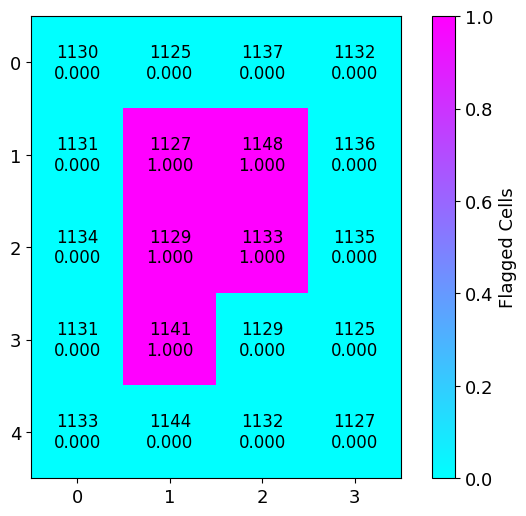

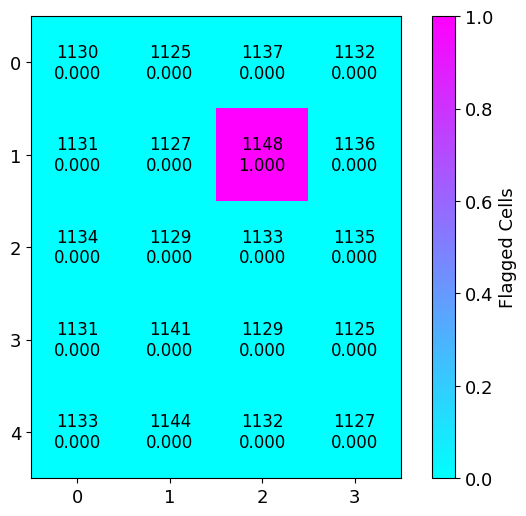

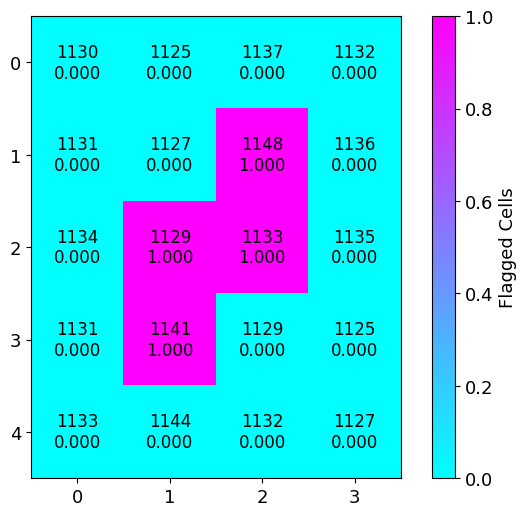

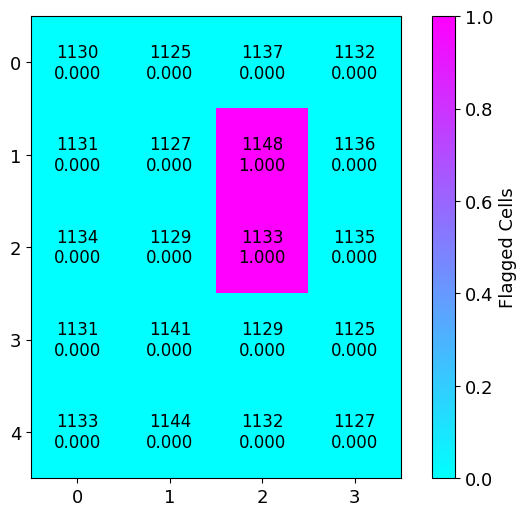

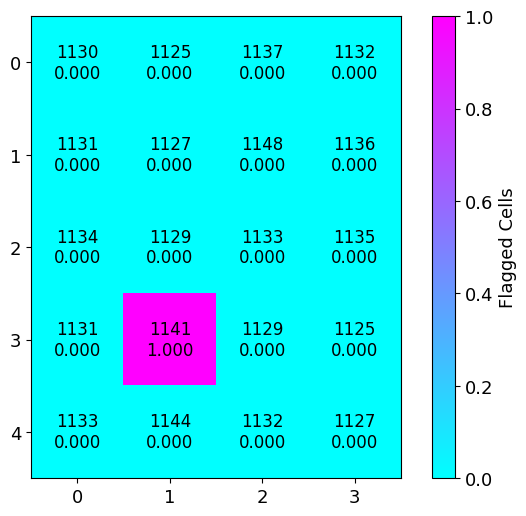

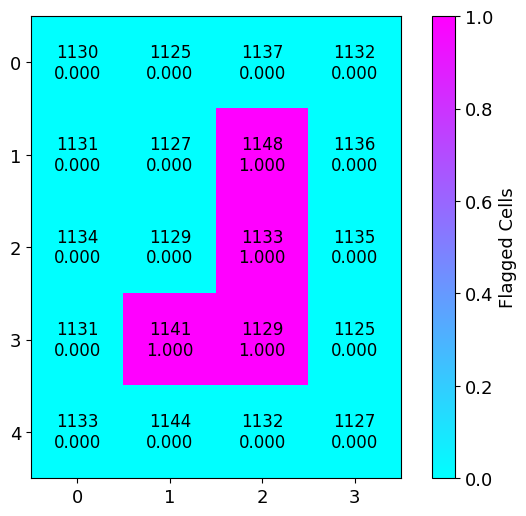

In [22]:
# Corrected visualization with fixed coordinate alignment
def visualize_propagated_flagging(elevation_array):
    """
    Visualize the flagged arrays for all cells from (1, 1) to (n-1, m-1) with corrected coordinate alignment.
    """
    
    rows, cols = elevation_array.shape
    weightSlopeArray=np.zeros_like(elevation_array, dtype=float)
    for i in range(1, rows-1):  # Start from (1,1) and exclude borders
        for j in range(1, cols-1):
            #print("the row and col are: ",i,j)
            flagged_array = propagate_flagging(elevation_array, (i, j))
            #flagged_array = propagate_flagging_With_Slope(elevation_array, (i, j), cell_size=1)
            #print("the flagged array is: ",flagged_array)
            weightSlopeArray[i,j]=np.sum(flagged_array)
            #print(f"the weightSlopeArray at {i,j} is: ",weightSlopeArray[i,j])
            fig, ax = plt.subplots()
            plt.imshow(flagged_array, cmap='cool')
            plt.colorbar(label="Flagged Cells")
                    # Annotate the cell with the value from the array, or use a symbol conditionally
            for ii in range(0, rows): 
                for jj in range(0, cols):
                    value = flagged_array[ii, jj]
                    #print(f"the weightslope array value at {ii,jj} is: ",value)
                    c = elevation_array[ii,jj]  # Example condition
                    ax.text(jj, ii, f'{c}\n{value:.3f}', va='center', ha='center', fontsize=12, color="black")
                    #plt.title(f"Propagated Flagging for Center Cell ({ii}, {jj})")
            
            
                   
            
    return flagged_array

elevation_array = np.array([
    [1130, 1125, 1137, 1132],
    [1131, 1127, 1148, 1136],
    [1134, 1129, 1133, 1135],
    [1131, 1141, 1129, 1125],   
    [1133, 1144, 1132, 1127],
])
# elevation_array = np.array([
#     [1130, 1125, 1137, 1132,1130, 1125, 1137, 1132],
#     [1131, 1127, 1148, 1136,1131, 1127, 1148, 1136],
#     [1134, 1129, 1133, 1135,1134, 1129, 1133, 1135],
#     [1131, 1141, 1129, 1125,1131, 1141, 1129, 1125],   
#     [1133, 1144, 1132, 1127,1133, 1144, 1132, 1127],
# ])
rows,cols=elevation_array.shape

#fig, ax = plt.subplots(figsize=(8, 6))
# plt.imshow(elevation_array, cmap='viridis')
# for i in range(0, rows): 
#     for j in range(0, cols):
#         # Annotate the cell with the value from the array, or use a symbol conditionally
#         value = elevation_array[i, j]
#         index= f'({i}, {j})'
#         c = elevation_array[i,j] if value >0 else elevation_array[i,j]  # Example condition
#         ax.text(j, i, f'{c}\n{index}', va='center', ha='center', fontsize=12, color="black")
# plt.title("Elevation Array with Cell Coordinates")
# Execute the fixed visualization
# visualize_propagated_flagging(elevation_array) 
# fig, ax = plt.subplots(figsize=(8, 6))
# Static_contributing_area_array=calculate_contributingArea_for_cell(elevation_array, 1)
# plt.imshow(Static_contributing_area_array, cmap='viridis')
# for i in range(0, rows): 
#     for j in range(0, cols):
#         # Annotate the cell with the value from the array, or use a symbol conditionally
#         value = Static_contributing_area_array[i, j]
#         c = elevation_array[i,j] if value >0 else elevation_array[i,j]  # Example condition
#         ax.text(j, i, f'{c}\n{value:.1f}', va='center', ha='center', fontsize=12, color="black")
# plt.title("Contributing Area for each cell")
# twi_array,contributing_area_array,average_slope_array = Calculate_TWI_corrected_SlopeWeight(elevation_array, 1)
# plt.imshow(twi_array, cmap='viridis')
# for i in range(0, rows): 
#     for j in range(0, cols):
#         # Annotate the cell with the value from the array, or use a symbol conditionally
#         value = twi_array[i, j]
#         print("the twi value is: ",value)
#         c = elevation_array[i,j]if value >=0.0 else elevation_array[i,j]  # Example condition
#         ax.text(j, i, f'{c}\n{value:.1f}', va='center', ha='center', fontsize=12, color="black")
# plt.title("twi_array for each cell")
# downwardSlope = calculateDownwardSlope(elevation_array, 1)
# plt.imshow(downwardSlope, cmap='viridis')
# for i in range(0, rows): 
#     for j in range(0, cols):
#         # Annotate the cell with the value from the array, or use a symbol conditionally
#         value = downwardSlope[i, j]
#         #print("the twi value is: ",value)
#         c = elevation_array[i,j]if value >=0.0 else elevation_array[i,j]  # Example condition
#         ax.text(j, i, f'{c}\n{value:.1f}', va='center', ha='center', fontsize=12, color="black")
# plt.title("downwardslope length")
visualize_propagated_flagging(elevation_array) 
#visualize_propagated_flagging(elevation_array_Transposed)


#### <font color="orange">This code is independent of the direction of starting the algorithm.</font>
<font color="chocolate">proved by the below two codes. In these the extended slope algorithm is applied to the array and its transpose. Both arrays show the same TWI values for pixels using both arrays. </font>

Text(0.5, 1.0, 'twi_array')

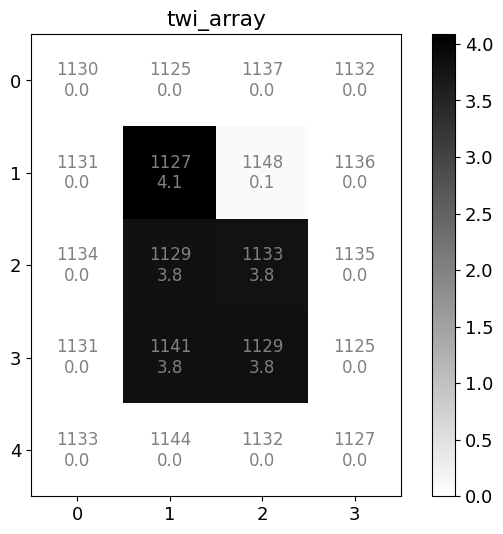

In [25]:
twi_array,weightSlopeArray=Calculate_TWI_extendedSlope(elevation_array, 1)
rows,cols=elevation_array.shape
fig, ax = plt.subplots(figsize=(8, 6))
plt.imshow(twi_array,cmap="binary")
plt.colorbar()
plt.title("TWI_array")
for i in range(0, rows): 
    for j in range(0, cols):
        # Annotate the cell with the value from the array, or use a symbol conditionally
        value = twi_array[i, j]
        #print("the twi value is: ",value)
        c = elevation_array[i,j]if value >=0.0 else elevation_array[i,j]  # Example condition
        ax.text(j, i, f'{c}\n{value:.1f}', va='center', ha='center', fontsize=12, color="grey")
plt.title("twi_array")

d:\OneDrive - purdue.edu\AutomatingAgFieldTrials\DOE_code\summer2021\DOE_ag\autoAG\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\OneDrive - purdue.edu\AutomatingAgFieldTrials\DOE_code\summer2021\DOE_ag\autoAG\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'twi_array')

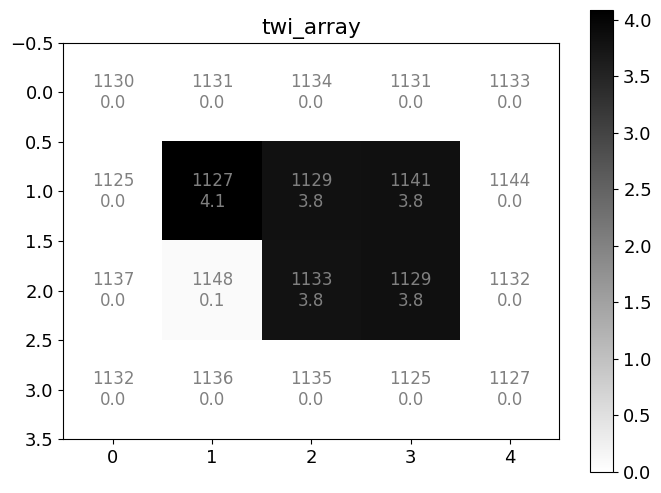

In [23]:
elevation_array_Transposed=elevation_array.T
rows,cols=elevation_array_Transposed.shape
twi_array,weightSlopeArray=Calculate_TWI_extendedSlope(elevation_array_Transposed, 1)
fig, ax = plt.subplots(figsize=(8, 6))
plt.imshow(twi_array,cmap="binary")
plt.colorbar()
plt.title("TWI_array")
for i in range(0, rows): 
    for j in range(0, cols):
        # Annotate the cell with the value from the array, or use a symbol conditionally
        value = twi_array[i, j]
        #print("the twi value is: ",value)
        c = elevation_array_Transposed[i,j]if value >=0.0 else elevation_array_Transposed[i,j]  # Example condition
        ax.text(j, i, f'{c}\n{value:.1f}', va='center', ha='center', fontsize=12, color="grey")
plt.title("twi_array")

#### <font color="orange"> The contour map of the field. Contours are plotted to join same elevation points by lines.</font>

Text(0.5, 1.0, 'Elevation Contour at 1m resolution')

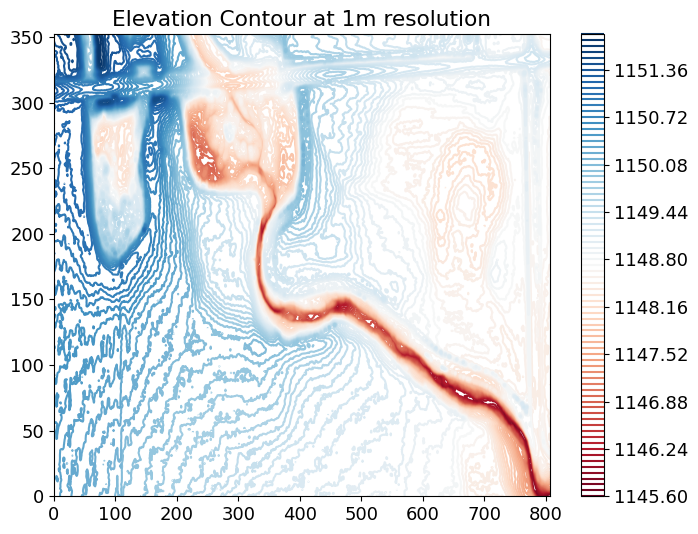

In [26]:
plt.contour(elevationArray.T,100, cmap='RdBu')
plt.colorbar()
plt.title("Elevation Contour at 1m resolution")

#### <font color="orange">The nearest slope weight algorithm. </font>
<font color="mistyrose"> this considers the weight of slopes for pixels attached to the current pixel.</font>

In [98]:
#twi_array_nearest,contributingArray_nearest  = Calculate_TWI(np.flipud(elevationArrayDict["imgAcreMergedUSGSVectorLowerRes"]).T, resDict["imgAcreMergedUSGSVectorLowerRes"])
#twi_array_nearest,contributingArray_nearest  = Calculate_TWI(np.flipud(elevationArrayDict["imgAcreMergedUSGSVectorLowRes"].T), resDict["imgAcreMergedUSGSVectorLowRes"])
twi_array_nearest,contributingArray_nearest  = Calculate_TWI(np.flipud(elevationArrayDict["imgAcreMergedUSGSVectorHighRes"].T), resDict["imgAcreMergedUSGSVectorHighRes"])


d:\OneDrive - purdue.edu\AutomatingAgFieldTrials\DOE_code\summer2021\DOE_ag\autoAG\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\OneDrive - purdue.edu\AutomatingAgFieldTrials\DOE_code\summer2021\DOE_ag\autoAG\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'contributing_area_array for 1 m\n resolution with nearest slope weight algorithm')

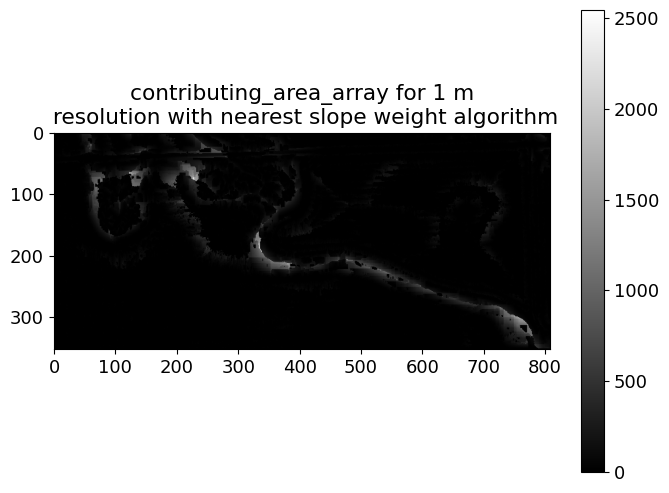

In [99]:
plt.imshow(contributingArray_nearest,cmap="binary_r")   
plt.colorbar()
rows, cols = contributingArray_nearest.shape
#plt.title("contributing_area_array for 10 m\n resolution with nearest slope weight algorithm")
#plt.title("contributing_area_array for 5 m\n resolution with nearest slope weight algorithm")
plt.title("contributing_area_array for 1 m\n resolution with nearest slope weight algorithm")


Text(0.5, 1.0, 'TWI_array for 1m\n resolution with nearest slope weight algorithm')

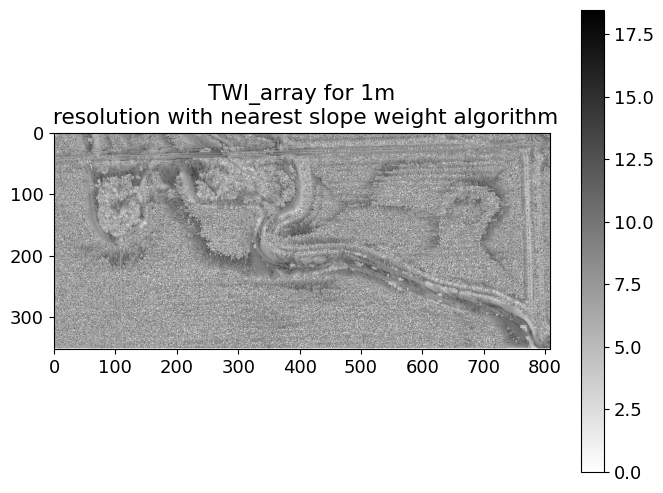

In [100]:
plt.imshow(twi_array_nearest,cmap="binary", )
plt.colorbar()
#plt.title("TWI_array for 10 m\n resolution with nearest slope weight algorithm")
#plt.title("TWI_array for 5m\n resolution with nearest slope weight algorithm")#
plt.title("TWI_array for 1m\n resolution with nearest slope weight algorithm")#


#### <font color="orange">The extended slope weight algorithm. </font>
<font color="mistyrose"> this considers the weight of slopes for pixels of all contributing pixels to the current pixel.</font>

In [92]:
#twi_array,contributingArray  = Calculate_TWI_extendedSlope(np.flipud(elevationArrayDict["imgAcreMergedUSGSVectorLowerRes"].T), resDict["imgAcreMergedUSGSVectorLowerRes"])
twi_array,contributingArray  = Calculate_TWI_extendedSlope(np.flipud(elevationArrayDict["imgAcreMergedUSGSVectorLowRes"].T), resDict["imgAcreMergedUSGSVectorLowRes"])
#twi_array,contributingArray  = Calculate_TWI_extendedSlope(elevationArrayDict["imgAcreMergedUSGSVectorHighRes"], resDict["imgAcreMergedUSGSVectorHighRes"])


d:\OneDrive - purdue.edu\AutomatingAgFieldTrials\DOE_code\summer2021\DOE_ag\autoAG\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\OneDrive - purdue.edu\AutomatingAgFieldTrials\DOE_code\summer2021\DOE_ag\autoAG\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

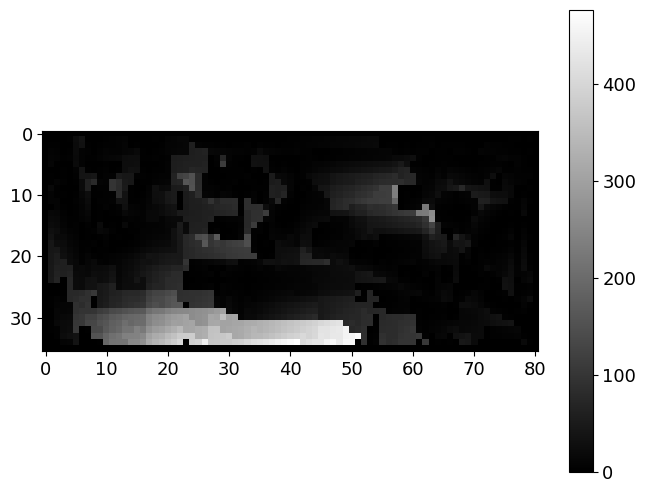

In [87]:

plt.imshow(contributingArray,cmap="binary_r")   
plt.colorbar()
rows, cols = contributingArray.shape
#plt.title("contributing_area_array for 10 m\n resolution with extended slope weight algorithm")
#plt.title("contributing_area_array for 5 m\n resolution with extended slope weight algorithm")
#plt.title("contributing_area_array for 1 m\n resolution with extended slope weight algorithm")



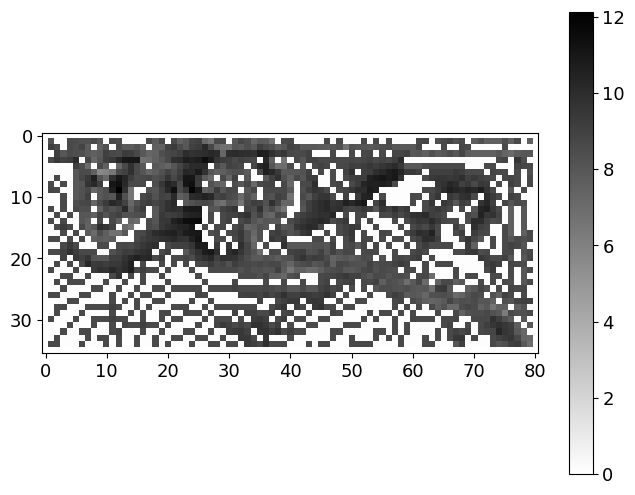

In [88]:
plt.imshow(twi_array,cmap="binary", )
plt.colorbar()
#plt.title("TWI_array for 10 m\n resolution with extended slope weight algorithm")
#plt.title("TWI_array for 5m\n resolution with extended slope weight algorithm")#
#plt.title("TWI_array for 1m\n resolution with extended slope weight algorithm")#


In [ ]:
#elevationArrayTransposed=elevationArray.T
from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_points_griddata, rasterize_points_radial
#imgAcreMergedUSGSVectorHighRes["elevationArrayTransposed"]=elevationArrayTransposed.flatten()

geo_grid = make_geocube(
    vector_data=imgAcreMergedUSGSVectorLowRes,
    measurements=['elevation(m)'],
    resolution=(-1,1),
    rasterize_function=rasterize_points_griddata,
)
geo_grid.rio.to_raster('D:\OneDrive - purdue.edu\AutomatingAgFieldTrials\Fall2024\SEPAC_H3\SEPAC_H3_plots\JVKField2elevation_5m.tiff')

In [169]:
from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_points_griddata, rasterize_points_radial
imgAcreMergedUSGSVectorHighRes["TWI_extendedSlope"]=twi_array.flatten()

geo_grid = make_geocube(
    vector_data=imgAcreMergedUSGSVectorHighRes,
    measurements=['TWI_extendedSlope'],
    resolution=(-1,1),
    rasterize_function=rasterize_points_griddata,
)
geo_grid.rio.to_raster('D:\OneDrive - purdue.edu\AutomatingAgFieldTrials\Fall2024\SEPAC_H3\SEPAC_H3_plots\JVKField2TWI_extendedSlope1m.tiff')

In [ ]:
def PlotTWI(df,twi_array, res, note):
    #import matplotlib.colors as colors
    df["TWI"]=twi_array.flatten()
    TPIptsgdfLowerRes_clipped=gpd.clip(df,fieldShapeUTM)
   
    myax=TPIptsgdfLowerRes_clipped.plot(column="TWI",markersize=1, marker="s",cmap="binary",legend=True,legend_kwds={"label": f"TWI","fmt": "{:.1f}", "orientation": "vertical", 'shrink':0.4, 'aspect':30})
    fieldShapeUTM.plot(ax=myax, color="None",edgecolor="black",linestyle=":",  alpha=0.8)

    #plt.title(f"TWI calculated at Purdue ACRE\n with grid res {str(res)}m",fontsize=16)
    #plt.title(f"Topographic Wetness Index ",fontsize=12)

    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    myax.text(0.05, -0.05, 'JVK-Field2', transform=myax.transAxes, fontsize=12, va='bottom', ha='left')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    #plt.savefig(f"D:\OneDrive - purdue.edu\AutomatingAgFieldTrials\Fall2024\SEPAC_H3\SEPAC_H3_plots\{note}_JVKField2_{str(res)}_TWI.png", dpi=1200, format='png', bbox_inches='tight')
    #plt.savefig(f"/Users/jhasneha/Documents/DOEjha/SEPAC-H3/plots/Transposed_TWI_JVKField2_{str(res)}.png", dpi=600, format='png', bbox_inches='tight')

    plt.show()


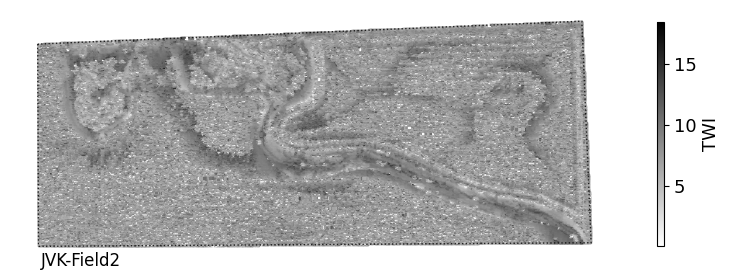

In [101]:
# """the array are being oriented to match with the lat/long coordinates of the dataframe here. 
# This is required here only because I wanted to visualize the array in previos code cells in the same prientation as the geographical north. The array in numpy 
# orients or starts from the top left corner of the image. So, the orientation is flipped to match the geographical orientation of the dataframe."""
twi_array_nearest_og=np.flipud(twi_array_nearest).T
#twi_array_og=np.flipud(twi_array).T
#PlotTWI(imgAcreMergedUSGSVectorLowerRes,twi_array_og, resDict["imgAcreMergedUSGSVectorLowerRes"], note="extendedslope")
PlotTWI(imgAcreMergedUSGSVectorHighRes,twi_array_nearest_og, resDict["imgAcreMergedUSGSVectorHighRes"], note="nearestslope")